## Cournot Monopoly with Dynamic Demand

### Packages

In [149]:
import numpy as np
np.set_printoptions(precision=2)
import scipy.stats as stats
import matplotlib.pyplot as plt

### Cournot

Dynamic Demand:
- $p_t = u_t - v \sum_i q_{it} + x_t$ 
- $x_t = \rho x_{t-1} + e_t, e_t \sim N(0,\sigma)$

Walrasian 
- $\pi_w = \max_{q_i}{(p - w) q_i}$ 
- $w = u - v Q$
- $Q_w = \frac{u-w}{v}$
- $P_w = w$
- $q_w \in [0,Q_w], \pi_w = 0, \Pi_w = 0$

Nash
- $\pi_c = \max_{q_i}{(p(Q) - w) q_i}$ 
- $p(Q) - w - v q_i = 0$
- $n p(Q) = n w + v Q = n u - n v Q$
- $Q_c = \frac{n(u-w)}{v(n+1)}$
- $P_c = u - v Q$
- $q_c = Q_c/n$

Monopoly
- $\pi_m = \max_{Q}{(p(Q) - w) Q}$ 
- $p(Q)=w+vQ=u-vQ$ 
- $Q_m =\frac{u-w}{2v}$ 
- $P_m =\frac{u-w}{2v}$


In [150]:
# parameters of model
gamma = 0.9
u = 40
v = 1
w = 4
n = 1
sigma = 0.05
rho = 0.1

In [163]:
def price(Q,u,v):
    return u-v*Q

def profit(P,Q):
    return
           
class cournot:
    def __init__(self,u,v,w,n):
        self.u=u
        self.v=v
        self.w=w
        self.n=n
        self.Qw=(u-w)/v
        self.Qc=n*(u-w)/v/(n+1)
        self.Qm=(u-w)/2*v
        self.Pw = price(self.Qw,u,v)
        self.Pc = price(self.Qc,u,v)
        self.Pm = price(self.Qm,u,v)
        self.Πw = 0
        self.Πc = (self.Pc-w)*self.Qc
        self.Πm = (self.Pm-w)*self.Qm
        self.qw = self.Qw/n
        self.qc = self.Qc/n
        self.qm = self.Qm/n
        self.πw = 0
        self.πc = self.Πc/n
        self.πm = self.Πm/n
    
    def price(self,Q):
        return self.u-v*(Q)
    
    def profit(self,Q):
        return (self.price(Q)-w)*Q
    
def whichidx(value, array):
    return np.argmin(np.abs(array-value))

game1 = cournot(u,v,w,n)

In [164]:
# Competition
game1.Qc, game1.qc, game1.Pc, game1.Πc, game1.profit(game1.qc)

(18.0, 18.0, 22.0, 324.0, 324.0)

In [165]:
# Monopoly
game1.Qm, game1.qm, game1.Pm, game1.Πm, game1.profit(game1.Qm)

(18.0, 18.0, 22.0, 324.0, 324.0)

### Shocks

In [166]:
# Input: ρ, σ, K
# Output: KxK Transition Matrix
P = np.array([[0.5,0.5,0],
              [0.1, 0.8, 0.1],
              [0, 0.5, 0.5]])

Z = np.array([-4, 0, 4])

### Q-Learning

In [167]:
import random
import numpy as np

# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state2, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state2,:])
    logits = (Q[state2,:] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

# initialize the state
state1 = 0
state2 = 0
u = 0
uidx = 0

# initialize the Q-table
game = game1
num_states2 = 3
num_actions = 50
P = np.array([[0.5,0.5,0],
              [0.1, 0.8, 0.1],
              [0, 0.5, 0.5]])

Z = np.array([-4, 0, 4])

uidx = int(round(num_states2/2))

# parameters of model
gamma = 0.9
u = 40
v = 1
w = 4
n = 2
sigma = 0.05
rho = 0.1

Q1 = np.random.uniform(cournot(u,v,w,n).Πc,cournot(u,v,w,n).Πm,(num_states2, num_actions))

# histories
q1_history = []
u_history = []
qc_history=[]
qm_history=[]
pc_history=[]
pm_history=[]

print(cournot(u,v,w,n).Qc,cournot(u,v,w,n).Qm)
print(cournot(u+4,v,w,n).Qc,cournot(u-4,v,w,n).Qm)

action2quantity = np.linspace(16,27,num_actions)
action2quantity

24.0 18.0
26.666666666666668 16.0


array([16.  , 16.22, 16.45, 16.67, 16.9 , 17.12, 17.35, 17.57, 17.8 ,
       18.02, 18.24, 18.47, 18.69, 18.92, 19.14, 19.37, 19.59, 19.82,
       20.04, 20.27, 20.49, 20.71, 20.94, 21.16, 21.39, 21.61, 21.84,
       22.06, 22.29, 22.51, 22.73, 22.96, 23.18, 23.41, 23.63, 23.86,
       24.08, 24.31, 24.53, 24.76, 24.98, 25.2 , 25.43, 25.65, 25.88,
       26.1 , 26.33, 26.55, 26.78, 27.  ])

In [168]:
# initialize Boltzmann Q-learning parameters
alpha = 0.1
initial_temperature = 1.0
temperature_decay = 0.99999
min_temperature = 0.01
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.99999
min_eps = 0.01
eps = initial_eps
errors = []
num_episodes = 1000000

In [66]:
# initialize Boltzmann Q-learning parameters
alpha = 0.01
initial_temperature = 1.0
temperature_decay = 0.9999
min_temperature = 0.01
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.9999
min_eps = 0.01
eps = initial_eps
errors = []
num_episodes = 100000

In [169]:
# run Boltzmann Q-learning for a fixed number of episodes
for episode in range(num_episodes):

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, uidx, temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    quantity1 = action2quantity[action1]

    # rewards
    reward1 = cournot(u,v,w,n).profit(quantity1)

    # update the Q-value for the selected action in the current state
    Q1[uidx][action1] =  (1-alpha)*Q1[uidx][action1] + alpha * (reward1 + gamma * np.max(np.average(Q1,axis=0,weights=P[uidx])))
    
    # generate shock
    uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    u = 40 + Z[uidx]
    
    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)
    error = reward1 + gamma * np.max(Q1[uidx])-Q1[uidx][action1] 
    errors.append(error)
    if episode%10000 == 0:  
        print(f'{episode},{np.mean(errors[-10000:]):0.2f},{uidx:0.2f}, {action1:0.2f}, {reward1:0.2f},  {temperature:0.2f}, {eps:0.2f}')
    
    u_history.append(u)
    q1_history.append(quantity1)
    qc_history.append(cournot(u,v,w,n).Qc)
    qm_history.append(cournot(u,v,w,n).Qm)
    pc_history.append(cournot(u,v,w,n).profit(quantity1))
  

0,293.25,1.00, 18.00, 319.84,  1.00, 1.00
10000,298.05,1.00, 5.00, 323.23,  0.90, 0.90
20000,155.69,0.00, 37.00, 187.01,  0.82, 0.82
30000,56.02,1.00, 15.00, 322.13,  0.74, 0.74
40000,20.95,1.00, 4.00, 322.79,  0.67, 0.67
50000,8.31,1.00, 20.00, 317.80,  0.61, 0.61
60000,5.40,1.00, 32.00, 297.13,  0.55, 0.55
70000,3.15,2.00, 32.00, 297.13,  0.50, 0.50
80000,3.01,1.00, 11.00, 323.78,  0.45, 0.45
90000,2.42,1.00, 23.00, 229.34,  0.41, 0.41
100000,2.78,1.00, 7.00, 323.82,  0.37, 0.37
110000,2.08,1.00, 7.00, 323.82,  0.33, 0.33
120000,1.18,2.00, 18.00, 400.00,  0.30, 0.30
130000,1.72,2.00, 21.00, 399.49,  0.27, 0.27
140000,1.46,1.00, 9.00, 324.00,  0.25, 0.25
150000,2.41,1.00, 6.00, 323.57,  0.22, 0.22
160000,1.88,1.00, 8.00, 323.96,  0.20, 0.20
170000,1.90,0.00, 8.00, 323.96,  0.18, 0.18
180000,1.56,1.00, 10.00, 323.94,  0.17, 0.17
190000,1.77,1.00, 11.00, 323.78,  0.15, 0.15
200000,2.63,1.00, 18.00, 400.00,  0.14, 0.14
210000,1.44,2.00, 17.00, 399.97,  0.12, 0.12
220000,1.99,1.00, 8.00, 

### Check Q

In [170]:
for uidx in range(num_states2):
    action1 = boltzmann_action_selection(Q1, uidx, 0.0001)
    print(uidx, action1, np.abs((1-alpha)*Q1[uidx][action1] + alpha * (reward1 + gamma * np.max(np.average(Q1,axis=0,weights=P[uidx])))-Q1[uidx][action1]), Q1[uidx][action1]-reward1 - gamma * np.max(np.average(Q1,axis=0,weights=P[uidx]))) 

0 0 0.0 -4.547473508864641e-13
1 9 6.79995835068712 67.99958350686939
2 18 14.399833402748754 143.998334027488


### Check Probs 

In [171]:
def boltzmann_action_probs(Q, state2, temperature=0.0001):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state2,:])
    logits = (Q[state2,:] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    return probs

In [172]:
# Average Response
for uidx in range(num_states2):
        print(uidx,np.round(boltzmann_action_probs(Q1,uidx),2))

0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


### Plot

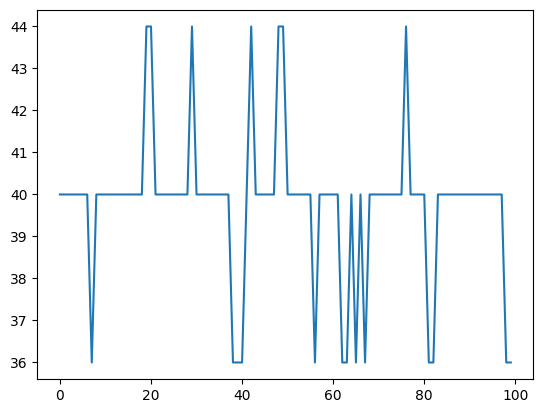

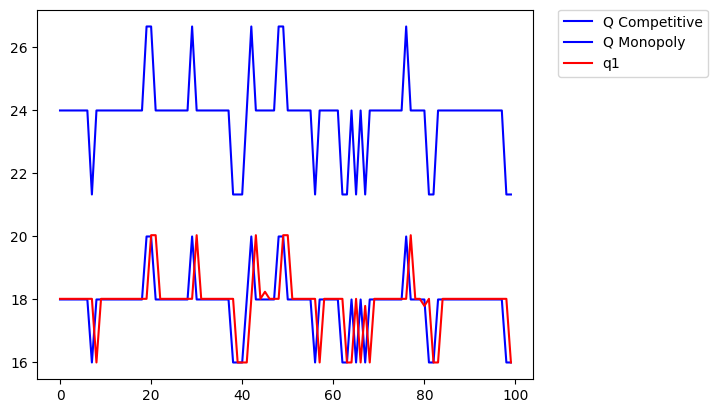

In [182]:
import matplotlib.pyplot as plt
k = 100
plt.plot(u_history[-k:])
plt.show()

plt.plot(qc_history[-k:], 'b', label = 'Q Competitive')
plt.plot(qm_history[-k:], 'b', label = 'Q Monopoly')
plt.plot(q1_history[-k:], 'r', label = 'q1')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### Correlations with shocks

In [174]:
k = 1000
np.corrcoef(u_history[-k:], q1_history[-k:])

array([[1.  , 0.43],
       [0.43, 1.  ]])

### Impulse Response

In [176]:
# initialize the state
u = 40
uidx = 0
q1_impulse=[]
qm_impulse = []
qc_impulse = []
temperature=0.0001
# run Boltzmann Q-learning for a fixed number of episodes
num_episodes = 100
for episode in range(num_episodes):

    if episode in [25]:
        uidx = 1
    elif episode in [50]:
        uidx = 2
    
    action1 = boltzmann_action_selection(Q1,uidx,temperature)
    quantity1 = action2quantity[action1]

    # rewards
    reward1 = cournot(u,v,w,n).profit(quantity1)

   # generate shock
    u = 40 + Z[uidx]
    q1_impulse.append(quantity1)
    qm_impulse.append(cournot(u,v,w,n).Qm)


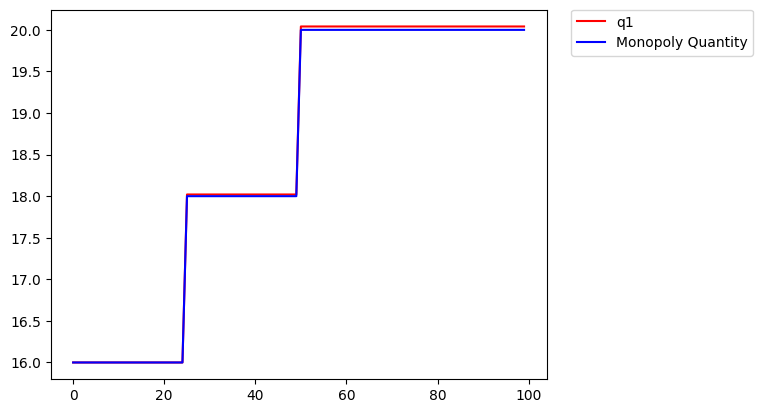

In [184]:
import matplotlib.pyplot as plt
plt.plot(q1_impulse, 'r', label = 'q1')
plt.plot(qm_impulse, 'b', label = 'Monopoly Quantity')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()